## Reading and Understanding the data

In [1]:
# Suppress Warnings 

import warnings 
warnings.filterwarnings('ignore')



In [2]:
# Importing Libraries 

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge , Lasso 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


pd.set_option('display.max_columns', 500)
pd.options.display.max_rows = 300

In [3]:
# Importing dataset

housingInfo = pd.read_csv('train.csv', encoding = 'latin')
housingInfo.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Inspecting Datasets

In [4]:
housingInfo.shape

(1460, 81)

In [5]:
housingInfo.size

118260

In [6]:
housingInfo.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [7]:
housingInfo.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
housingInfo.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

In [9]:
housingInfo.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

## Data Cleansing 

###  Removing/Imputing NaN values in categorical variable.

In [10]:


housingInfo.select_dtypes(include='object').isnull().sum()
[housingInfo.select_dtypes(include='object').isnull().sum()>0]

[MSZoning         False
 Street           False
 Alley             True
 LotShape         False
 LandContour      False
 Utilities        False
 LotConfig        False
 LandSlope        False
 Neighborhood     False
 Condition1       False
 Condition2       False
 BldgType         False
 HouseStyle       False
 RoofStyle        False
 RoofMatl         False
 Exterior1st      False
 Exterior2nd      False
 MasVnrType        True
 ExterQual        False
 ExterCond        False
 Foundation       False
 BsmtQual          True
 BsmtCond          True
 BsmtExposure      True
 BsmtFinType1      True
 BsmtFinType2      True
 Heating          False
 HeatingQC        False
 CentralAir       False
 Electrical        True
 KitchenQual      False
 Functional       False
 FireplaceQu       True
 GarageType        True
 GarageFinish      True
 GarageQual        True
 GarageCond        True
 PavedDrive       False
 PoolQC            True
 Fence             True
 MiscFeature       True
 SaleType       

In [11]:


# Replace NA with None in the following columns below : 

for col in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical'):
    
    housingInfo[col]=housingInfo[col].fillna('None')



#### Remove categorical attributes that have more than 85% data associated to one value.

- We will remove any column that has one value repeating 1241 times (1241/1450)*100 = 85%) as this column would be skewed
  to one value




In [12]:
def getHighCategoricalValueCounts():
    column = []
    categorical_columns = housingInfo.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(housingInfo[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighCategoricalValueCounts()



In [13]:
# Remove the columns with skewed data

housingInfo.drop(columnsToBeRemoved, axis = 1, inplace = True)

housingInfo.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,None,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,None,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,None,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,None,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,None,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,None,0,12,2008,Normal,250000


In [14]:
housingInfo.select_dtypes(include='object').isnull().sum()
[housingInfo.select_dtypes(include='object').isnull().sum()>0]

[MSZoning         False
 LotShape         False
 LotConfig        False
 Neighborhood     False
 BldgType         False
 HouseStyle       False
 RoofStyle        False
 Exterior1st      False
 Exterior2nd      False
 MasVnrType       False
 ExterQual        False
 Foundation       False
 BsmtQual         False
 BsmtExposure     False
 BsmtFinType1     False
 HeatingQC        False
 KitchenQual      False
 FireplaceQu      False
 GarageType       False
 GarageFinish     False
 Fence            False
 SaleCondition    False
 dtype: bool]

There are no null values left in the categorical variables.

#### Removing Null Values in the Numerical Variables 

In [15]:
housingInfo.select_dtypes(include=['int64','float']).isnull().sum()
[housingInfo.select_dtypes(include=['int64','float']).isnull().sum()>0]
                                                                  

[Id               False
 MSSubClass       False
 LotFrontage       True
 LotArea          False
 OverallQual      False
 OverallCond      False
 YearBuilt        False
 YearRemodAdd     False
 MasVnrArea        True
 BsmtFinSF1       False
 BsmtFinSF2       False
 BsmtUnfSF        False
 TotalBsmtSF      False
 1stFlrSF         False
 2ndFlrSF         False
 LowQualFinSF     False
 GrLivArea        False
 BsmtFullBath     False
 BsmtHalfBath     False
 FullBath         False
 HalfBath         False
 BedroomAbvGr     False
 KitchenAbvGr     False
 TotRmsAbvGrd     False
 Fireplaces       False
 GarageYrBlt       True
 GarageCars       False
 GarageArea       False
 WoodDeckSF       False
 OpenPorchSF      False
 EnclosedPorch    False
 3SsnPorch        False
 ScreenPorch      False
 PoolArea         False
 MiscVal          False
 MoSold           False
 YrSold           False
 SalePrice        False
 dtype: bool]

There are  null values in the Numerical Variables in GarageYrBlt ,LotFrontage , MasVnrArea

In [16]:

housingInfo['LotFrontage'] = housingInfo['LotFrontage'].replace(np.nan, housingInfo['LotFrontage'].median())
housingInfo['MasVnrArea'] = housingInfo['MasVnrArea'].replace(np.nan, housingInfo['MasVnrArea'].median())

In [17]:

housingInfo['GarageYrBlt']=housingInfo['GarageYrBlt'].fillna(0)
housingInfo['GarageYrBlt'] = housingInfo['GarageYrBlt'].astype(int)

Imputed the null values in lot frontage adn masvnrarea with median and in Garageyrbuilt with 0

In [18]:
# Remodelling the hiuse with mentioned function 

def checkForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
housingInfo['IsRemodelled'] = housingInfo.apply(checkForRemodel, axis=1)
housingInfo.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,None,Attchd,2003,RFn,2,548,0,61,0,0,0,0,None,0,2,2008,Normal,208500,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976,RFn,2,460,298,0,0,0,0,0,None,0,5,2007,Normal,181500,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001,RFn,2,608,0,42,0,0,0,0,None,0,9,2008,Normal,223500,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998,Unf,3,642,0,35,272,0,0,0,None,0,2,2006,Abnorml,140000,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000,RFn,3,836,192,84,0,0,0,0,None,0,12,2008,Normal,250000,0


In [19]:
# determining age of building at the time of selling 

def getBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
housingInfo['BuiltOrRemodelAge'] = housingInfo.apply(getBuiltOrRemodelAge, axis=1)
housingInfo.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,None,Attchd,2003,RFn,2,548,0,61,0,0,0,0,None,0,2,2008,Normal,208500,0,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976,RFn,2,460,298,0,0,0,0,0,None,0,5,2007,Normal,181500,0,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001,RFn,2,608,0,42,0,0,0,0,None,0,9,2008,Normal,223500,1,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998,Unf,3,642,0,35,272,0,0,0,None,0,2,2006,Abnorml,140000,1,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000,RFn,3,836,192,84,0,0,0,0,None,0,12,2008,Normal,250000,0,8


In [20]:
# finding age of garage

def getGarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
housingInfo['OldOrNewGarage'] = housingInfo['GarageYrBlt'].apply(getGarageConstructionPeriod)
housingInfo.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,None,Attchd,2003,RFn,2,548,0,61,0,0,0,0,None,0,2,2008,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976,RFn,2,460,298,0,0,0,0,0,None,0,5,2007,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001,RFn,2,608,0,42,0,0,0,0,None,0,9,2008,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998,Unf,3,642,0,35,272,0,0,0,None,0,2,2006,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000,RFn,3,836,192,84,0,0,0,0,None,0,12,2008,Normal,250000,0,8,1


In [21]:
housingInfo.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)


#### 
Remove numerical attributes that have more than 85% data associated to one value.

- We will remove any column that has one value repeating 1241 times (1241/1450)*100 = 85%) as this column would be skewed
  to one value



In [22]:
def getHighNumericalValueCounts():
    column = []
    numerical_columns = housingInfo.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(housingInfo[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighNumericalValueCounts()
housingInfo.drop(columnsToBeRemoved, axis = 1, inplace = True)

housingInfo.drop(['MoSold'], axis = 1, inplace = True)

housingInfo.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,None,Attchd,RFn,2,548,0,61,None,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,RFn,2,460,298,0,None,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,RFn,2,608,0,42,None,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,Unf,3,642,0,35,None,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,RFn,3,836,192,84,None,Normal,250000,0,8,1


In [23]:
# Null values percentage

percent_missing = round(100*(housingInfo.isnull().sum()/len(housingInfo.index)), 2)
print(percent_missing)

Id                   0.0
MSSubClass           0.0
MSZoning             0.0
LotFrontage          0.0
LotArea              0.0
LotShape             0.0
LotConfig            0.0
Neighborhood         0.0
BldgType             0.0
HouseStyle           0.0
OverallQual          0.0
OverallCond          0.0
RoofStyle            0.0
Exterior1st          0.0
Exterior2nd          0.0
MasVnrType           0.0
MasVnrArea           0.0
ExterQual            0.0
Foundation           0.0
BsmtQual             0.0
BsmtExposure         0.0
BsmtFinType1         0.0
BsmtFinSF1           0.0
BsmtUnfSF            0.0
TotalBsmtSF          0.0
HeatingQC            0.0
1stFlrSF             0.0
2ndFlrSF             0.0
GrLivArea            0.0
BsmtFullBath         0.0
FullBath             0.0
HalfBath             0.0
BedroomAbvGr         0.0
KitchenQual          0.0
TotRmsAbvGrd         0.0
Fireplaces           0.0
FireplaceQu          0.0
GarageType           0.0
GarageFinish         0.0
GarageCars           0.0


In [24]:
# Checking duplicates 

housingInfo[housingInfo.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage


There are no duplicates variables 

#### Checking Outliers and Treating them 

In [25]:

housingInfo.describe(percentiles=[.25,.5,.75,.90,.95,.99])


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,1162.626712,346.992466,1515.463699,0.425342,1.565068,0.382877,2.866438,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,0.476712,22.950000,0.275342
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,386.587738,436.528436,525.480383,0.518911,0.550916,0.502885,0.815778,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,0.499629,20.640653,0.446840
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,0.000000,4.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,2.000000,0.000000,3.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,0.000000,14.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,2.000000,1.000000,3.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,1.000000,41.000000,1.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,1680.000000,954.200000,2158.300000,1.000000,2.000000,1.000000,4.000000,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,278000.000000,1.000000,56.000000,1.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,1831.250000,1141.050000,2466.100000,1.000000,2.000000,1.000000,4.000000,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,326100.000000,1.000000,58.000000,1.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,2219.460000,1418.920000,3123.480000,2.000000,3.000000,1.000000,5.000000,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,442567.010000,1.000000,60.000000,1.000000


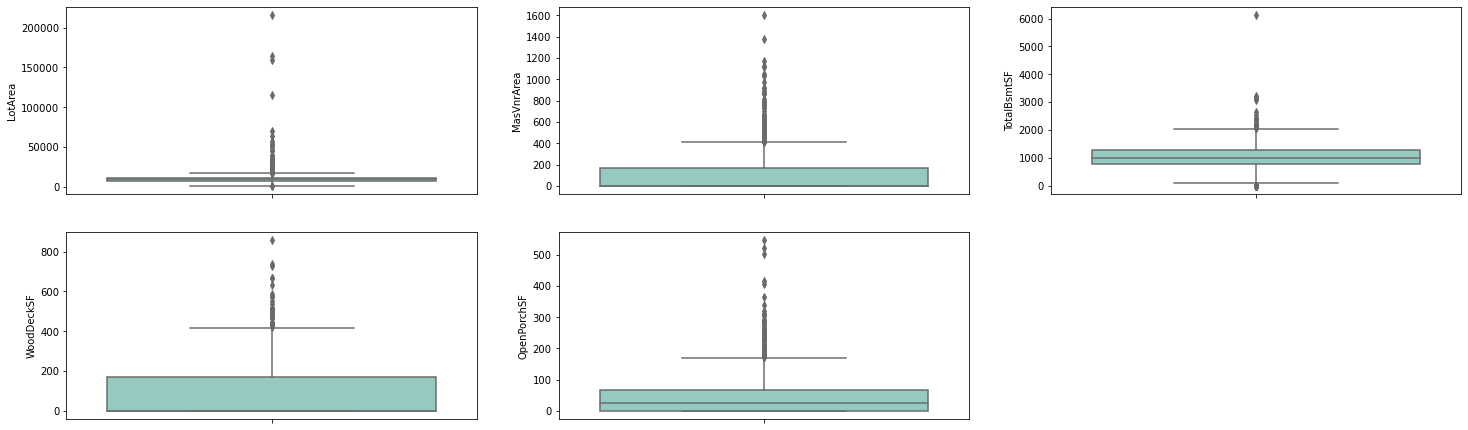

In [26]:
# plotting of outliers 

plt.figure(figsize=(25, 20))

plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = housingInfo)

plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = housingInfo)

plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = housingInfo)

plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = housingInfo)

plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = housingInfo)

plt.show();

In [27]:
# Removing Outliers

# Removing values beyond 98% for LotArea

nn_quartile_LotArea = housingInfo['LotArea'].quantile(0.98)
housingInfo = housingInfo[housingInfo["LotArea"] < nn_quartile_LotArea]

# Removing values beyond 98% for MasVnrArea

nn_quartile_MasVnrArea = housingInfo['MasVnrArea'].quantile(0.98)
housingInfo = housingInfo[housingInfo["MasVnrArea"] < nn_quartile_MasVnrArea]

# Removing values beyond 99% for TotalBsmtSF

nn_quartile_TotalBsmtSF = housingInfo['TotalBsmtSF'].quantile(0.99)
housingInfo = housingInfo[housingInfo["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

nn_quartile_WoodDeckSF = housingInfo['WoodDeckSF'].quantile(0.99)
housingInfo = housingInfo[housingInfo["WoodDeckSF"] < nn_quartile_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

nn_quartile_OpenPorchSF = housingInfo['OpenPorchSF'].quantile(0.99)
housingInfo = housingInfo[housingInfo["OpenPorchSF"] < nn_quartile_OpenPorchSF]

In [28]:
num_data = round(100*(len(housingInfo)/1460),2)
print(num_data)

93.01


Data retained is 93 %

## Data Visualisation 

Our target variable is SalesPrice and all the operation will be performed on it...

Some of the data points are here and there while most of the curve is normally distributed.

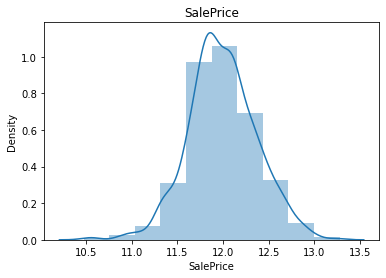

In [29]:
housingInfo['SalePrice'] = np.log1p(housingInfo['SalePrice'])

plt.title('SalePrice')
sns.distplot(housingInfo['SalePrice'], bins=10)
plt.show();

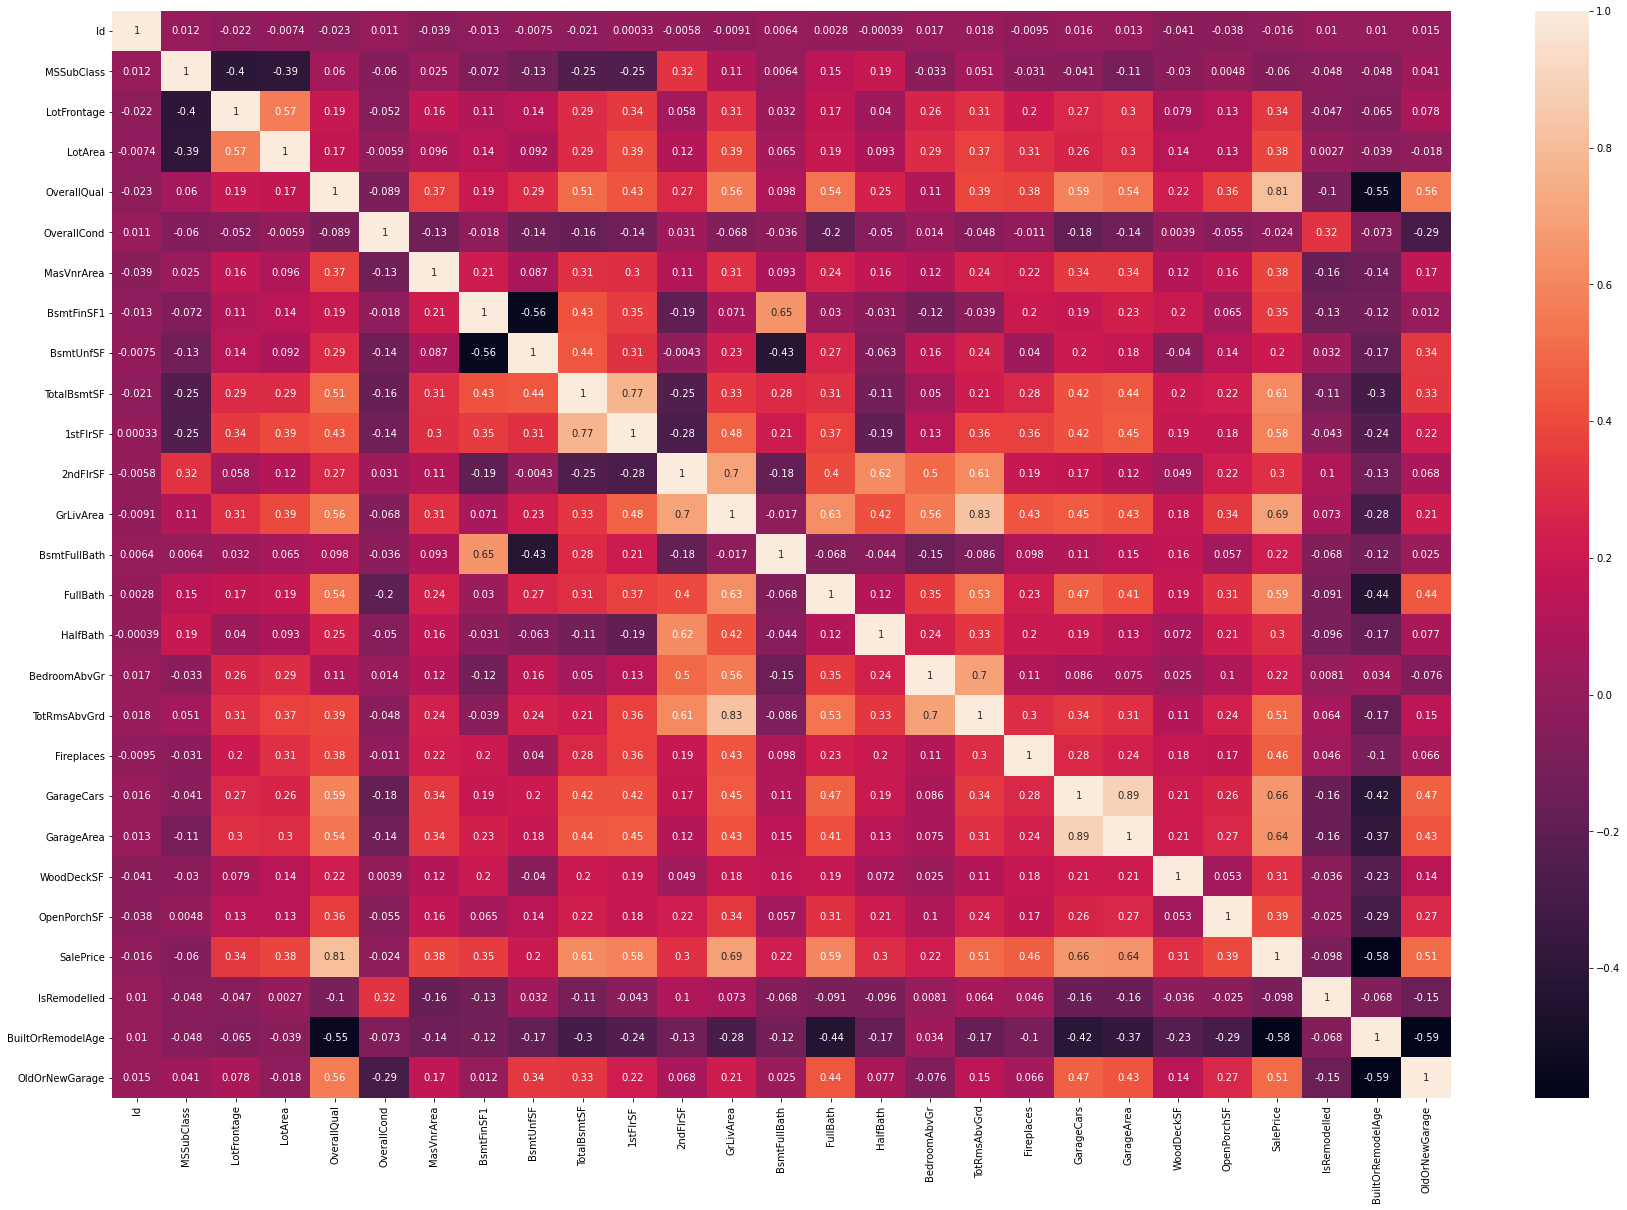

In [30]:

## correlation matrix 


plt.figure(figsize = (30, 20))
sns.heatmap(housingInfo.corr(), annot = True)
plt.show()


Removing the columns which have high correlation such as -

Overallqual has 81% correlation

GrLivArea and TotRmaAbvgrd has 83% correlation

Garagecars and GarageArea  has 89% correlation 


##### Dropping columns with high correlation 

In [31]:

housingInfo.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [32]:
housingInfo.shape

(1358, 47)

## Data Preparation

#### Converting Categorical into Numerical Variables 
#### Creating Dummy Variables 

In [33]:

housingInfo['d_LotShape'] = housingInfo['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
housingInfo['d_ExterQual'] = housingInfo['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
housingInfo['d_BsmtQual'] = housingInfo['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housingInfo['d_BsmtExposure'] = housingInfo['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
housingInfo['d_BsmtFinType1'] = housingInfo['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
housingInfo['d_HeatingQC'] = housingInfo['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housingInfo['d_KitchenQual'] = housingInfo['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housingInfo['d_FireplaceQu'] = housingInfo['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housingInfo['d_GarageFinish'] = housingInfo['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
housingInfo['d_BldgType'] = housingInfo['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
housingInfo['d_HouseStyle'] = housingInfo['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
housingInfo['d_Fence'] = housingInfo['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
housingInfo['d_LotConfig'] = housingInfo['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
housingInfo['d_MasVnrType'] = housingInfo['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
housingInfo['d_SaleCondition'] = housingInfo['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
housingInfo.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage,d_LotShape,d_ExterQual,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,0,None,Attchd,RFn,2,0,61,None,Normal,12.247699,0,5,1,3,4,4,1,6,5,4,0,2,1,4,0,5,1,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,1,TA,Attchd,RFn,2,298,0,None,Normal,12.109016,0,31,0,3,3,4,4,5,5,3,3,2,1,1,0,2,0,1
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,1,TA,Attchd,RFn,2,0,42,None,Normal,12.317171,1,6,1,2,4,4,2,6,5,4,3,2,1,4,0,5,1,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,1,Gd,Detchd,Unf,3,0,35,None,Abnorml,11.849405,1,36,0,2,3,3,1,5,4,4,4,1,1,4,0,4,0,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,1,TA,Attchd,RFn,3,192,84,None,Normal,12.429220,0,8,1,2,4,4,3,6,5,4,3,2,1,4,0,2,1,1


In [34]:
# Dropping the old columns now 

housingInfo = housingInfo.drop(['Id', 'LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

housingInfo.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,Foundation,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageType,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage,d_LotShape,d_ExterQual,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,196.0,PConc,706,150,856,856,854,1710,1,2,1,3,0,Attchd,2,0,61,12.247699,0,5,1,3,4,4,1,6,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,0.0,CBlock,978,284,1262,1262,0,1262,0,2,0,3,1,Attchd,2,298,0,12.109016,0,31,0,3,3,4,4,5,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,162.0,PConc,486,434,920,920,866,1786,1,2,1,3,1,Attchd,2,0,42,12.317171,1,6,1,2,4,4,2,6,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,0.0,BrkTil,216,540,756,961,756,1717,1,1,0,3,1,Detchd,3,0,35,11.849405,1,36,0,2,3,3,1,5,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,350.0,PConc,655,490,1145,1145,1053,2198,1,2,1,4,1,Attchd,3,192,84,12.429220,0,8,1,2,4,4,3,6,5,4,3,2,1,4,0,2,1,1


In [35]:
# Creating dummies for MSZoning

d_MSZoning = pd.get_dummies(housingInfo['MSZoning'], prefix='MSZoning', drop_first = True)
housingInfo = pd.concat([housingInfo, d_MSZoning], axis = 1)

# Creating dummies for Neighborhood

d_Neighborhood = pd.get_dummies(housingInfo['Neighborhood'], prefix='Neighborhood', drop_first = True)
housingInfo = pd.concat([housingInfo, d_Neighborhood], axis = 1)

# Creating dummies for RoofStyle

d_RoofStyle = pd.get_dummies(housingInfo['RoofStyle'], prefix='RoofStyle', drop_first = True)
housingInfo = pd.concat([housingInfo, d_RoofStyle], axis = 1)

# Creating dummies for Exterior1st

d_Exterior1st = pd.get_dummies(housingInfo['Exterior1st'], prefix='Exterior1st', drop_first = True)
housingInfo = pd.concat([housingInfo, d_Exterior1st], axis = 1)

# Creating dummies for Exterior2nd

d_Exterior2nd = pd.get_dummies(housingInfo['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
housingInfo = pd.concat([housingInfo, d_Exterior2nd], axis = 1)

# Creating dummies for Foundation

d_Foundation = pd.get_dummies(housingInfo['Foundation'], prefix='Foundation', drop_first = True)
housingInfo = pd.concat([housingInfo, d_Foundation], axis = 1)

# Creating dummies for GarageType

d_GarageType = pd.get_dummies(housingInfo['GarageType'], prefix='GarageType', drop_first = True)
housingInfo = pd.concat([housingInfo, d_GarageType], axis = 1)

housingInfo.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,Foundation,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageType,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage,d_LotShape,d_ExterQual,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,196.0,PConc,706,150,856,856,854,1710,1,2,1,3,0,Attchd,2,0,61,12.247699,0,5,1,3,4,4,1,6,5,4,0,2,1,4,0,5,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,0.0,CBlock,978,284,1262,1262,0,1262,0,2,0,3,1,Attchd,2,298,0,12.109016,0,31,0,3,3,4,4,5,5,3,3,2,1,1,0,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,162.0,PConc,486,434,920,920,866,1786,1,2,1,3,1,Attchd,2,0,42,12.317171,1,6,1,2,4,4,2,6,5,4,3,2,1,4,0,5,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,0.0,BrkTil,216,540,756,961,756,1717,1,1,0,3,1,Detchd,3,0,35,11.849405,1,36,0,2,3,3,1,5,4,4,4,1,1,4,0,4,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,350.0,PConc,655,490,1145,1145,1053,2198,1,2,1,4,1,Attchd,3,192,84,12.429220,0,8,1,2,4,4,3,6,5,4,3,2,1,4,0,2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [36]:

housingInfo = housingInfo.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)

housingInfo.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage,d_LotShape,d_ExterQual,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,854,1710,1,2,1,3,0,2,0,61,12.247699,0,5,1,3,4,4,1,6,5,4,0,2,1,4,0,5,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,0,1262,0,2,0,3,1,2,298,0,12.109016,0,31,0,3,3,4,4,5,5,3,3,2,1,1,0,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,866,1786,1,2,1,3,1,2,0,42,12.317171,1,6,1,2,4,4,2,6,5,4,3,2,1,4,0,5,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,756,1717,1,1,0,3,1,3,0,35,11.849405,1,36,0,2,3,3,1,5,4,4,4,1,1,4,0,4,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,1053,2198,1,2,1,4,1,3,192,84,12.429220,0,8,1,2,4,4,3,6,5,4,3,2,1,4,0,2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [37]:


housingInfo.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Columns: 112 entries, MSSubClass to GarageType_None
dtypes: float64(3), int64(36), uint8(73)
memory usage: 521.2 KB


All the columns have been converted into Numerical values 

## Train and Test Split 

In [38]:
X = housingInfo.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage,d_LotShape,d_ExterQual,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,854,1710,1,2,1,3,0,2,0,61,0,5,1,3,4,4,1,6,5,4,0,2,1,4,0,5,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,0,1262,0,2,0,3,1,2,298,0,0,31,0,3,3,4,4,5,5,3,3,2,1,1,0,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,866,1786,1,2,1,3,1,2,0,42,1,6,1,2,4,4,2,6,5,4,3,2,1,4,0,5,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,756,1717,1,1,0,3,1,3,0,35,1,36,0,2,3,3,1,5,4,4,4,1,1,4,0,4,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,1053,2198,1,2,1,4,1,3,192,84,0,8,1,2,4,4,3,6,5,4,3,2,1,4,0,2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [39]:
y = housingInfo['SalePrice']
y.head()


0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [40]:
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object', length=111)

In [41]:

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

## Recursive Feature Elimination 

There are around 111 variables adn we want to take the best 50 feature variables

In [42]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 50)            
rfe = rfe.fit(X_train, y_train)

In [43]:
col = X_train.columns[rfe.support_]



temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_))
                       , columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,LotArea,True,1
1,OverallQual,True,1
2,OverallCond,True,1
3,BsmtFinSF1,True,1
4,TotalBsmtSF,True,1
5,1stFlrSF,True,1
6,2ndFlrSF,True,1
7,GrLivArea,True,1
8,BsmtFullBath,True,1
9,FullBath,True,1


In [44]:
X_train_rfe = X_train[col]

In [45]:

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

## Model Building And Evaluation 

### Ridge Regression

In [46]:

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    4.5s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [47]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
16,5,-0.077858,-0.083995,1
17,6,-0.077911,-0.084008,2
18,7,-0.077960,-0.084023,3
15,4,-0.077810,-0.084028,4
19,8,-0.078009,-0.084038,5
20,9,-0.078055,-0.084054,6
21,10,-0.078096,-0.084068,7
14,3,-0.077763,-0.084105,8
22,20,-0.078414,-0.084171,9
13,2,-0.077718,-0.084206,10


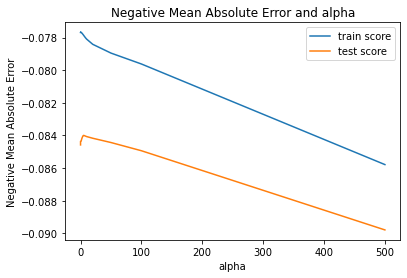

In [48]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')

In [49]:

ridge_model_cv.best_estimator_

Ridge(alpha=5.0)

In [50]:
# check the coefficient values with lambda = 5

alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.02244198,  0.06859185,  0.04618573,  0.03242458,  0.04464796,
        0.01532592,  0.00985187,  0.08705043,  0.01173237,  0.01224633,
        0.02064679,  0.02113356,  0.03650477,  0.01013136, -0.01232161,
       -0.01749244,  0.01377259,  0.01446551,  0.01603191,  0.01847855,
        0.01649622,  0.01500834, -0.02007079,  0.01463695,  0.06802661,
        0.02731043,  0.10504997,  0.07645522,  0.02578389, -0.0112971 ,
       -0.00812036, -0.00658859,  0.02281546, -0.01556288, -0.00956514,
        0.017402  , -0.00942579, -0.01350217,  0.01231639, -0.04085293,
       -0.03196867,  0.01219062, -0.01680706,  0.03557507,  0.02069669,
        0.02222556,  0.04299123,  0.01730159,  0.00695619, -0.00968378])

In [51]:

mean_squared_error(y_test, ridge.predict(X_test))

0.013714006883317498

In [52]:
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,LotArea,0.0224
1,OverallQual,0.0686
2,OverallCond,0.0462
3,BsmtFinSF1,0.0324
4,TotalBsmtSF,0.0446
5,1stFlrSF,0.0153
6,2ndFlrSF,0.0099
7,GrLivArea,0.0871
8,BsmtFullBath,0.0117
9,FullBath,0.0122


In [53]:
ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'LotArea': 0.0224,
 'OverallQual': 0.0686,
 'OverallCond': 0.0462,
 'BsmtFinSF1': 0.0324,
 'TotalBsmtSF': 0.0446,
 '1stFlrSF': 0.0153,
 '2ndFlrSF': 0.0099,
 'GrLivArea': 0.0871,
 'BsmtFullBath': 0.0117,
 'FullBath': 0.0122,
 'HalfBath': 0.0206,
 'Fireplaces': 0.0211,
 'GarageCars': 0.0365,
 'WoodDeckSF': 0.0101,
 'IsRemodelled': -0.0123,
 'BuiltOrRemodelAge': -0.0175,
 'OldOrNewGarage': 0.0138,
 'd_BsmtQual': 0.0145,
 'd_BsmtExposure': 0.016,
 'd_HeatingQC': 0.0185,
 'd_KitchenQual': 0.0165,
 'd_GarageFinish': 0.015,
 'd_BldgType': -0.0201,
 'd_SaleCondition': 0.0146,
 'MSZoning_FV': 0.068,
 'MSZoning_RH': 0.0273,
 'MSZoning_RL': 0.105,
 'MSZoning_RM': 0.0765,
 'Neighborhood_Crawfor': 0.0258,
 'Neighborhood_Edwards': -0.0113,
 'Neighborhood_MeadowV': -0.0081,
 'Neighborhood_NWAmes': -0.0066,
 'Neighborhood_NridgHt': 0.0228,
 'Neighborhood_OldTown': -0.0156,
 'Neighborhood_SWISU': -0.0096,
 'Neighborhood_StoneBr': 0.0174,
 'Exterior1st_BrkComm': -0.0094,
 'Exterior1st_CemntBd': -0.0135

In [54]:
# Do an RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [55]:
import sklearn.metrics as metrics

In [56]:
print("\n The best estimator across ALL searched params:\n",
          ridge_model_cv.best_estimator_)
print("\n The best score across ALL searched params:\n",
          ridge_model_cv.best_score_)
print("\n The best parameters across ALL searched params:\n",
          ridge_model_cv.best_params_)



 The best estimator across ALL searched params:
 Ridge(alpha=5.0)

 The best score across ALL searched params:
 -0.08399453546911267

 The best parameters across ALL searched params:
 {'alpha': 5.0}


In [57]:
alpha = 5.0

ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.02244198,  0.06859185,  0.04618573,  0.03242458,  0.04464796,
        0.01532592,  0.00985187,  0.08705043,  0.01173237,  0.01224633,
        0.02064679,  0.02113356,  0.03650477,  0.01013136, -0.01232161,
       -0.01749244,  0.01377259,  0.01446551,  0.01603191,  0.01847855,
        0.01649622,  0.01500834, -0.02007079,  0.01463695,  0.06802661,
        0.02731043,  0.10504997,  0.07645522,  0.02578389, -0.0112971 ,
       -0.00812036, -0.00658859,  0.02281546, -0.01556288, -0.00956514,
        0.017402  , -0.00942579, -0.01350217,  0.01231639, -0.04085293,
       -0.03196867,  0.01219062, -0.01680706,  0.03557507,  0.02069669,
        0.02222556,  0.04299123,  0.01730159,  0.00695619, -0.00968378])

In [58]:
# predict for the training dataset
y_train_pred = ridge.predict(X_train)
print('The training accuracy is:')
print(metrics.r2_score(y_true=np.exp(y_train), y_pred=np.exp(y_train_pred)))

The training accuracy is:
0.9197976562695095


In [59]:
# predict for the test dataset
y_test_pred = ridge.predict(X_test)
print('The testing accuracy is:')
print(metrics.r2_score(y_true=np.exp(y_test), y_pred=np.exp(y_test_pred)))

The testing accuracy is:
0.9137211827832767


In [60]:
def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
10,MSZoning_RL,True,1,0.1050
5,GrLivArea,True,1,0.0871
11,MSZoning_RM,True,1,0.0765
1,OverallQual,True,1,0.0686
9,MSZoning_FV,True,1,0.0680
2,OverallCond,True,1,0.0462
4,TotalBsmtSF,True,1,0.0446
14,Foundation_PConc,True,1,0.0430
7,GarageCars,True,1,0.0365
3,BsmtFinSF1,True,1,0.0324


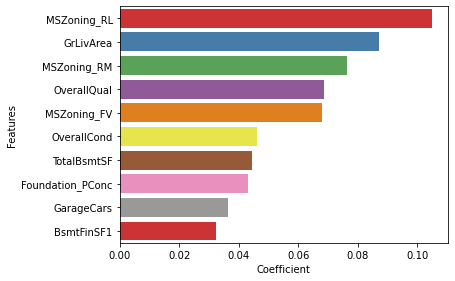

In [61]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()

### LASSO REGRESSION

In [62]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    3.1s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [63]:
# mean scores 

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']
                ].sort_values(by = ['rank_test_score'])


,param_alpha,mean_train_score,mean_test_score,rank_test_score
4,0.0005,-0.078045,-0.084196,1
3,0.0004,-0.077932,-0.084197,2
2,0.0003,-0.077840,-0.084253,3
1,0.0002,-0.077759,-0.084318,4
0,0.0001,-0.077699,-0.084416,5
5,0.001,-0.078700,-0.084681,6
6,0.002,-0.079565,-0.085242,7
7,0.003,-0.080113,-0.085610,8
8,0.004,-0.080610,-0.086044,9
9,0.005,-0.081198,-0.086506,10


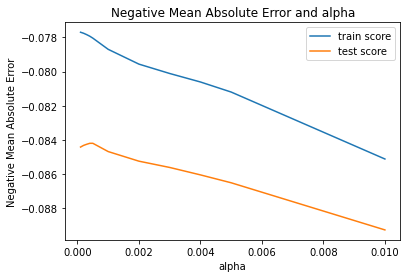

In [64]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [65]:
lasso_model_cv.best_estimator_

Lasso(alpha=0.0005)

In [66]:
# finding the coefficients value 

alpha = 0.0005

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 0.02192174,  0.07091224,  0.04596418,  0.03296041,  0.04524946,
        0.0068201 , -0.        ,  0.09879303,  0.01081883,  0.01036317,
        0.01963504,  0.02111826,  0.03692433,  0.00986284, -0.01208516,
       -0.01794362,  0.01286941,  0.01298041,  0.01598344,  0.01787189,
        0.01627665,  0.01514689, -0.01909375,  0.01472296,  0.06527664,
        0.02524564,  0.10028283,  0.07013572,  0.02498261, -0.01062534,
       -0.00771627, -0.00565968,  0.02152497, -0.01496844, -0.00953415,
        0.01605527, -0.009141  , -0.        ,  0.01078559, -0.02540798,
       -0.02850479,  0.        , -0.01513314,  0.02109609,  0.01675111,
        0.01887004,  0.04045895,  0.01568937,  0.00593085, -0.00915771])

In [67]:
# mean squared error 


mean_squared_error(y_test, lasso.predict(X_test))

0.013464242975623377

In [68]:
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,LotArea,0.0219
1,OverallQual,0.0709
2,OverallCond,0.0460
3,BsmtFinSF1,0.0330
4,TotalBsmtSF,0.0452
5,1stFlrSF,0.0068
6,GrLivArea,0.0988
7,BsmtFullBath,0.0108
8,FullBath,0.0104
9,HalfBath,0.0196


In [69]:
# creatin gdictionaries 

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'LotArea': 0.02192174073959966,
 'OverallQual': 0.07091223563064182,
 'OverallCond': 0.04596417524025089,
 'BsmtFinSF1': 0.0329604052951213,
 'TotalBsmtSF': 0.045249460392738354,
 '1stFlrSF': 0.0068200995569174215,
 '2ndFlrSF': -0.0,
 'GrLivArea': 0.09879302630451332,
 'BsmtFullBath': 0.010818826810128893,
 'FullBath': 0.010363165178013153,
 'HalfBath': 0.01963504396078604,
 'Fireplaces': 0.021118259861075697,
 'GarageCars': 0.03692432712163682,
 'WoodDeckSF': 0.009862841069910148,
 'IsRemodelled': -0.012085155614514915,
 'BuiltOrRemodelAge': -0.017943615295401127,
 'OldOrNewGarage': 0.012869406856548598,
 'd_BsmtQual': 0.012980406658576141,
 'd_BsmtExposure': 0.015983439445760028,
 'd_HeatingQC': 0.017871889570852253,
 'd_KitchenQual': 0.016276648277992366,
 'd_GarageFinish': 0.015146885818461412,
 'd_BldgType': -0.019093751829538298,
 'd_SaleCondition': 0.014722962748489273,
 'MSZoning_FV': 0.0652766429005268,
 'MSZoning_RH': 0.02524563698557408,
 'MSZoning_RL': 0.10028283181100164,

In [70]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [71]:
print("\n The best estimator across ALL searched params:\n",
          lasso_model_cv.best_estimator_)
print("\n The best score across ALL searched params:\n",
          lasso_model_cv.best_score_)
print("\n The best parameters across ALL searched params:\n",
          lasso_model_cv.best_params_)


 The best estimator across ALL searched params:
 Lasso(alpha=0.0005)

 The best score across ALL searched params:
 -0.08419638922866954

 The best parameters across ALL searched params:
 {'alpha': 0.0005}


In [72]:


alpha_lasso =0.0005

lasso = Lasso(alpha=alpha_lasso)
        
lasso.fit(X_train, y_train)



Lasso(alpha=0.0005)

In [73]:
lasso.coef_

array([ 0.02192174,  0.07091224,  0.04596418,  0.03296041,  0.04524946,
        0.0068201 , -0.        ,  0.09879303,  0.01081883,  0.01036317,
        0.01963504,  0.02111826,  0.03692433,  0.00986284, -0.01208516,
       -0.01794362,  0.01286941,  0.01298041,  0.01598344,  0.01787189,
        0.01627665,  0.01514689, -0.01909375,  0.01472296,  0.06527664,
        0.02524564,  0.10028283,  0.07013572,  0.02498261, -0.01062534,
       -0.00771627, -0.00565968,  0.02152497, -0.01496844, -0.00953415,
        0.01605527, -0.009141  , -0.        ,  0.01078559, -0.02540798,
       -0.02850479,  0.        , -0.01513314,  0.02109609,  0.01675111,
        0.01887004,  0.04045895,  0.01568937,  0.00593085, -0.00915771])

In [74]:
lm = Lasso(alpha=0.0005)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print('The training accuracy is:')
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print('The test accuracy is:')
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

The training accuracy is:
0.9186764840131485
The test accuracy is:
0.9032204931834114


In [75]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
11,MSZoning_RL,True,1,0.100283
5,GrLivArea,True,1,0.098793
1,OverallQual,True,1,0.070912
12,MSZoning_RM,True,1,0.070136
9,MSZoning_FV,True,1,0.065277
2,OverallCond,True,1,0.045964
4,TotalBsmtSF,True,1,0.045249
14,Foundation_PConc,True,1,0.040459
7,GarageCars,True,1,0.036924
3,BsmtFinSF1,True,1,0.032960


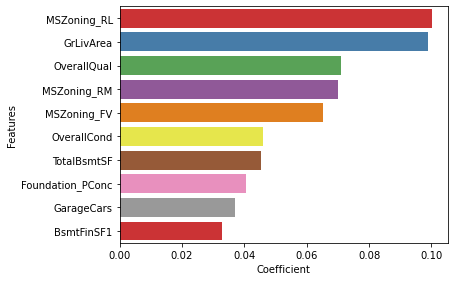

In [76]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

### Conclusion

#### Ridge Regression  :                                                                
                      Alpha = 5.0
                      Mean Squared Error = 0.013714
                      Training Accuracy = 91.97%
                      Test Accuracy = 91.37%
                     
#### Lasso Regression :
                      Alpha = 0.0005
                      Mean Squared Error = 0.013464
                      Training Accuracy = 91.87%
                      Test Accuracy = 90.62%

##### The mean squared error of lasso is little less than Ridge.

#####   Lasso helps in feature reduction (as the coefficient value of one of the feature became 0) so  Lasso has a better edge over Ridge.

##### According to Lasso the factors that generally affect the price are : 
                                                            1) MSZoning_RL 	
                                                            2)	GrLivArea 	
                                                            3)	OverallQual
                                                            4) 	MSZoning_RM 
                                                            5) 	MSZoning_FV 
                                                            6) 	OverallCond 	
                                                            7) 	TotalBsmtSF 
                                                            8) 	Foundation_PConc 	
                                                            9)	GarageCars 	
                                                            10) 	BsmtFinSF1 	
##### Therefore, the variables predicted by Lasso in the above bar chart as significant variables for predicting the price of a house


#### Doubling the value of alpha in  Ridge Regression 

previously Alpha = 5.0 

doubling it to Alpha = 10.0 

In [77]:
# check the coefficient values with lambda = 10

alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.02234555,  0.06899577,  0.04632114,  0.03236319,  0.04446942,
        0.02397996,  0.0195701 ,  0.07553071,  0.01192122,  0.01262324,
        0.02112442,  0.02159163,  0.0360826 ,  0.01012539, -0.01279944,
       -0.01795906,  0.01351146,  0.01438787,  0.01590523,  0.01837812,
        0.01687347,  0.01482815, -0.0197357 ,  0.01504214,  0.05806608,
        0.02220867,  0.0858179 ,  0.05919111,  0.02555963, -0.01109267,
       -0.00819598, -0.0065469 ,  0.02226521, -0.01495186, -0.00889316,
        0.01698499, -0.00932085, -0.01066399,  0.01215644, -0.03393861,
       -0.0303401 ,  0.00970572, -0.01655244,  0.02914909,  0.0192137 ,
        0.02086807,  0.0414212 ,  0.0169615 ,  0.00614735, -0.01006853])

In [78]:

mean_squared_error(y_test, ridge.predict(X_test))

0.013677973586354903

In [79]:
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,LotArea,0.0223
1,OverallQual,0.0690
2,OverallCond,0.0463
3,BsmtFinSF1,0.0324
4,TotalBsmtSF,0.0445
5,1stFlrSF,0.0240
6,2ndFlrSF,0.0196
7,GrLivArea,0.0755
8,BsmtFullBath,0.0119
9,FullBath,0.0126


In [80]:
# Do an RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [81]:
alpha = 10.0

ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.02234555,  0.06899577,  0.04632114,  0.03236319,  0.04446942,
        0.02397996,  0.0195701 ,  0.07553071,  0.01192122,  0.01262324,
        0.02112442,  0.02159163,  0.0360826 ,  0.01012539, -0.01279944,
       -0.01795906,  0.01351146,  0.01438787,  0.01590523,  0.01837812,
        0.01687347,  0.01482815, -0.0197357 ,  0.01504214,  0.05806608,
        0.02220867,  0.0858179 ,  0.05919111,  0.02555963, -0.01109267,
       -0.00819598, -0.0065469 ,  0.02226521, -0.01495186, -0.00889316,
        0.01698499, -0.00932085, -0.01066399,  0.01215644, -0.03393861,
       -0.0303401 ,  0.00970572, -0.01655244,  0.02914909,  0.0192137 ,
        0.02086807,  0.0414212 ,  0.0169615 ,  0.00614735, -0.01006853])

In [82]:
# predict for the training dataset
y_train_pred = ridge.predict(X_train)
print('The training accuracy is:')
print(metrics.r2_score(y_true=np.exp(y_train), y_pred=np.exp(y_train_pred)))

The training accuracy is:
0.9194532365985306


In [83]:
# predict for the test dataset
y_test_pred = ridge.predict(X_test)
print('The testing accuracy is:')
print(metrics.r2_score(y_true=np.exp(y_test), y_pred=np.exp(y_test_pred)))

The testing accuracy is:
0.9144270654938751


In [84]:
def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
10,MSZoning_RL,True,1,0.1050
5,GrLivArea,True,1,0.0871
11,MSZoning_RM,True,1,0.0765
1,OverallQual,True,1,0.0686
9,MSZoning_FV,True,1,0.0680
2,OverallCond,True,1,0.0462
4,TotalBsmtSF,True,1,0.0446
14,Foundation_PConc,True,1,0.0430
7,GarageCars,True,1,0.0365
3,BsmtFinSF1,True,1,0.0324


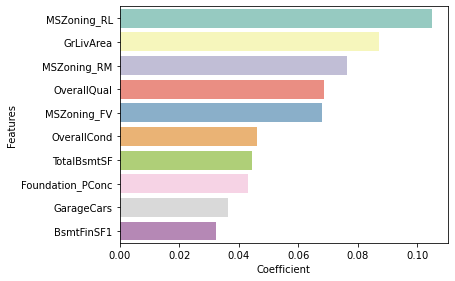

In [85]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set3', data = temp1_df)
plt.show()

### Doubling the value of Alpha in Lasso Regression

##### Previous Alpha : 0.0005

##### Doubled Alpha : 0.001

In [86]:
# finding the coefficients value 

alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 0.02116482,  0.07439953,  0.04628719,  0.03372956,  0.04525201,
        0.00807353,  0.        ,  0.09774441,  0.01027316,  0.00944824,
        0.01976144,  0.02171951,  0.03657522,  0.00964466, -0.01271435,
       -0.01905082,  0.01164903,  0.01104846,  0.01543676,  0.0173159 ,
        0.01626473,  0.01498602, -0.01770599,  0.01547921,  0.04670716,
        0.01504413,  0.06469816,  0.03641303,  0.02414309, -0.0095539 ,
       -0.00645517, -0.00478549,  0.01968436, -0.01348822, -0.00864596,
        0.01451498, -0.00869637, -0.        ,  0.00648872, -0.00273457,
       -0.02312464,  0.        , -0.01066712,  0.        ,  0.01099168,
        0.0139135 ,  0.03614831,  0.01357912,  0.00384251, -0.00925271])

In [87]:

mean_squared_error(y_test, lasso.predict(X_test))

0.013313252444530452

In [88]:
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,LotArea,0.0212
1,OverallQual,0.0744
2,OverallCond,0.0463
3,BsmtFinSF1,0.0337
4,TotalBsmtSF,0.0453
5,1stFlrSF,0.0081
6,GrLivArea,0.0977
7,BsmtFullBath,0.0103
8,FullBath,0.0094
9,HalfBath,0.0198


In [89]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [90]:

alpha_lasso =0.001

lasso = Lasso(alpha=alpha_lasso)
        
lasso.fit(X_train, y_train)


Lasso(alpha=0.001)

In [91]:
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print('The training accuracy is:')
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print('The test accuracy is:')
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

The training accuracy is:
0.916709606454228
The test accuracy is:
0.9043057966170767


In [92]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
12,MSZoning_RL,True,1,0.100283
5,GrLivArea,True,1,0.098793
1,OverallQual,True,1,0.070912
13,MSZoning_RM,True,1,0.070136
10,MSZoning_FV,True,1,0.065277
2,OverallCond,True,1,0.045964
4,TotalBsmtSF,True,1,0.045249
14,Foundation_PConc,True,1,0.040459
7,GarageCars,True,1,0.036924
3,BsmtFinSF1,True,1,0.032960


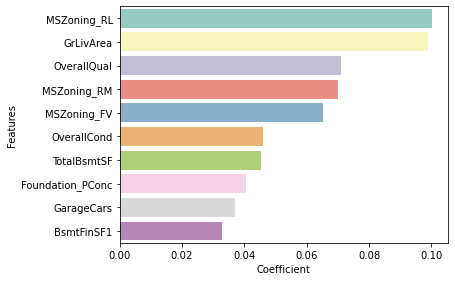

In [93]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set3', data = temp2_df)
plt.show()

#### Removing the TOP 5 Contributors from the Lasso Regression

In [94]:
X_train_new = X_train.drop(['MSZoning_RL', 'GrLivArea', 'OverallQual', 'MSZoning_RM' , 'MSZoning_FV'], axis=1)

In [95]:
X_test_new = X_train.drop(['MSZoning_RL', 'GrLivArea', 'OverallQual', 'MSZoning_RM' , 'MSZoning_FV'], axis=1)

In [96]:
X_train_new.columns

Index(['LotArea', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'Fireplaces',
       'GarageCars', 'WoodDeckSF', 'IsRemodelled', 'BuiltOrRemodelAge',
       'OldOrNewGarage', 'd_BsmtQual', 'd_BsmtExposure', 'd_HeatingQC',
       'd_KitchenQual', 'd_GarageFinish', 'd_BldgType', 'd_SaleCondition',
       'MSZoning_RH', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_MeadowV', 'Neighborhood_NWAmes', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_StoneBr',
       'Exterior1st_BrkComm', 'Exterior1st_CemntBd', 'Exterior1st_Stucco',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior2nd_CmentBd',
       'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng',
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
       'Foundation_Stone', 'GarageType_CarPort'],
      dtype='object')

In [97]:
lasso_model_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    2.4s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [98]:
cv_results_lasso = pd.DataFrame(lasso_model_cv.cv_results_)

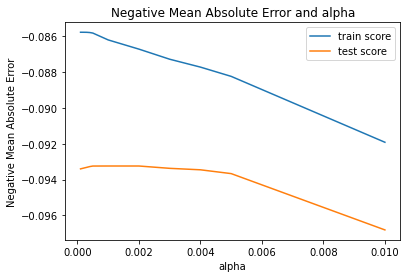

In [99]:
# plotting mean test and train scoes with alpha 

cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [100]:
lasso_model_cv.best_estimator_

Lasso(alpha=0.001)

In [101]:
# finding the coefficients value 

alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 0.02116482,  0.07439953,  0.04628719,  0.03372956,  0.04525201,
        0.00807353,  0.        ,  0.09774441,  0.01027316,  0.00944824,
        0.01976144,  0.02171951,  0.03657522,  0.00964466, -0.01271435,
       -0.01905082,  0.01164903,  0.01104846,  0.01543676,  0.0173159 ,
        0.01626473,  0.01498602, -0.01770599,  0.01547921,  0.04670716,
        0.01504413,  0.06469816,  0.03641303,  0.02414309, -0.0095539 ,
       -0.00645517, -0.00478549,  0.01968436, -0.01348822, -0.00864596,
        0.01451498, -0.00869637, -0.        ,  0.00648872, -0.00273457,
       -0.02312464,  0.        , -0.01066712,  0.        ,  0.01099168,
        0.0139135 ,  0.03614831,  0.01357912,  0.00384251, -0.00925271])

In [102]:

mean_squared_error(y_test, lasso.predict(X_test))

0.013313252444530452

In [103]:
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,LotArea,0.0212
1,OverallQual,0.0744
2,OverallCond,0.0463
3,BsmtFinSF1,0.0337
4,TotalBsmtSF,0.0453
5,1stFlrSF,0.0081
6,GrLivArea,0.0977
7,BsmtFullBath,0.0103
8,FullBath,0.0094
9,HalfBath,0.0198


In [104]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [105]:
print("\n The best estimator across ALL searched params:\n",
          lasso_model_cv.best_estimator_)
print("\n The best score across ALL searched params:\n",
          lasso_model_cv.best_score_)
print("\n The best parameters across ALL searched params:\n",
          lasso_model_cv.best_params_)


 The best estimator across ALL searched params:
 Lasso(alpha=0.001)

 The best score across ALL searched params:
 -0.09323859424395273

 The best parameters across ALL searched params:
 {'alpha': 0.001}


In [106]:
alpha_lasso =0.001

lasso = Lasso(alpha=alpha_lasso)
        
lasso.fit(X_train, y_train)


Lasso(alpha=0.001)

In [107]:
lasso.coef_

array([ 0.02116482,  0.07439953,  0.04628719,  0.03372956,  0.04525201,
        0.00807353,  0.        ,  0.09774441,  0.01027316,  0.00944824,
        0.01976144,  0.02171951,  0.03657522,  0.00964466, -0.01271435,
       -0.01905082,  0.01164903,  0.01104846,  0.01543676,  0.0173159 ,
        0.01626473,  0.01498602, -0.01770599,  0.01547921,  0.04670716,
        0.01504413,  0.06469816,  0.03641303,  0.02414309, -0.0095539 ,
       -0.00645517, -0.00478549,  0.01968436, -0.01348822, -0.00864596,
        0.01451498, -0.00869637, -0.        ,  0.00648872, -0.00273457,
       -0.02312464,  0.        , -0.01066712,  0.        ,  0.01099168,
        0.0139135 ,  0.03614831,  0.01357912,  0.00384251, -0.00925271])

In [108]:
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print('The training accuracy is:')
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print('The test accuracy is:')
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

The training accuracy is:
0.916709606454228
The test accuracy is:
0.9043057966170767


In [109]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
12,MSZoning_RL,True,1,0.100283
5,GrLivArea,True,1,0.098793
1,OverallQual,True,1,0.070912
13,MSZoning_RM,True,1,0.070136
10,MSZoning_FV,True,1,0.065277
2,OverallCond,True,1,0.045964
4,TotalBsmtSF,True,1,0.045249
14,Foundation_PConc,True,1,0.040459
7,GarageCars,True,1,0.036924
3,BsmtFinSF1,True,1,0.032960


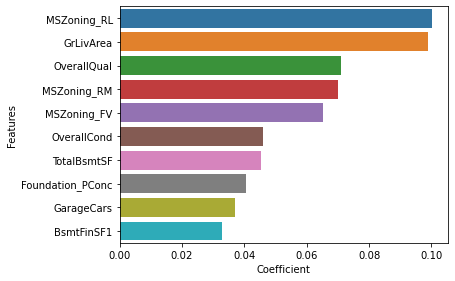

In [110]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', data = temp2_df)
plt.show()